<a href="https://colab.research.google.com/github/ppokranguser/Artificial_Intelligence_study/blob/main/240924_logistic_regression_blanks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression using PyTorch!

# Import Packages

In [244]:
# To see the progress
from tqdm.notebook import tqdm
# from tqdm import tqdm # for VSCODE, PYCHARM...OTHER "".py" BASED IDE.

import numpy as np

# For visualization
import matplotlib.pyplot as plt

# Things related to the pytorch
import torch                                 # main pytorch package
import torch.nn as nn                        # pytorch module for neural network
from torch.utils.data import Dataset, DataLoader   # pytorch utils for dataset


# Make the dataset!

In [245]:
# Make the dataset here

### To make the linear dataset. Define the gt_w and gt_b
gt_w = 4.0 # ground truth weight for linear regression
gt_b = -2.0 # ground truth bias for linear regression

### define the number of data, and value of noise to add to wx+b
num_data = 2000
noise_value = 2

### Sample some random X between range -1 ~ 1
x_range = np.array([-1,1])
x = np.linspace(x_range[0], x_range[1], num_data) #random data points

### Define some noise to add to wx+b
noise = noise_value * np.random.randn(num_data)
y_raw = gt_w * x + gt_b
y = gt_w * x + gt_b + noise


In [246]:
## print Truth Dataset
for x_i, y_i in zip(x, y_raw):
    print(x_i,y_i)

-1.0 -6.0
-0.9989994997498749 -5.995997998999499
-0.9979989994997499 -5.991995997999
-0.9969984992496248 -5.987993996998499
-0.9959979989994997 -5.983991995997998
-0.9949974987493747 -5.979989994997499
-0.9939969984992496 -5.975987993996998
-0.9929964982491246 -5.9719859929964985
-0.9919959979989995 -5.9679839919959985
-0.9909954977488744 -5.963981990995498
-0.9899949974987494 -5.959979989994998
-0.9889944972486243 -5.955977988994498
-0.9879939969984992 -5.951975987993997
-0.9869934967483742 -5.947973986993497
-0.9859929964982491 -5.943971985992997
-0.984992496248124 -5.939969984992496
-0.983991995997999 -5.935967983991996
-0.9829914957478739 -5.931965982991496
-0.9819909954977488 -5.927963981990995
-0.9809904952476238 -5.923961980990495
-0.9799899949974987 -5.919959979989995
-0.9789894947473737 -5.9159579789894945
-0.9779889944972486 -5.9119559779889945
-0.9769884942471235 -5.907953976988495
-0.9759879939969985 -5.903951975987994
-0.9749874937468734 -5.899949974987494
-0.9739869934967

In [247]:
## print Dataset
for x_i, y_i in zip(x,y):
    print(x_i,y_i)

-1.0 -6.361080175436372
-0.9989994997498749 -5.776091449951561
-0.9979989994997499 -6.676919785282003
-0.9969984992496248 -6.45827667757506
-0.9959979989994997 -6.392447895057255
-0.9949974987493747 -8.635881198644453
-0.9939969984992496 -3.9022586863464754
-0.9929964982491246 -5.151606771085683
-0.9919959979989995 -3.825778093093736
-0.9909954977488744 -6.87426398545026
-0.9899949974987494 -4.410143581538399
-0.9889944972486243 -3.929999104392408
-0.9879939969984992 -3.5408625198124652
-0.9869934967483742 -7.5533432395195295
-0.9859929964982491 -3.408369021193102
-0.984992496248124 -4.176797675854925
-0.983991995997999 -8.106980975429899
-0.9829914957478739 -5.979268750627197
-0.9819909954977488 -4.97881351207295
-0.9809904952476238 -10.099650761207602
-0.9799899949974987 -5.21136752752674
-0.9789894947473737 -4.2546069970882625
-0.9779889944972486 -7.364168917211579
-0.9769884942471235 -6.438299744925495
-0.9759879939969985 -4.75621761850176
-0.9749874937468734 -4.8834876733745025
-0

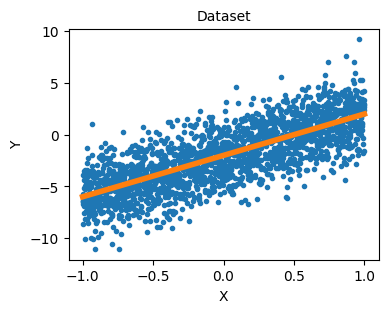

In [248]:
### Plot the dataset
plt.figure(figsize=(4,3))
plt.plot(x,y, '.')

### Plot the ground truth linear regressor
plt.plot(x_range, x_range*gt_w+gt_b, linewidth=4)

### Title and extras
plt.title('Dataset', fontsize=10)
plt.xlabel('X', fontsize=10)
plt.ylabel('Y', fontsize=10)
plt.show()

# Define the model

In [249]:
# Create model

class XY_Dataset(Dataset):
    def __init__(self, x, y):
        '''

        x : input points
        y : outpout points
        '''
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(x, dtype=torch.float32)
        self.num_data = x.shape[0]

        print("built new dataset!")

    def __len__(self):
        return self.num_data

    def __getitem__(self, idx):
        sample = dict()
        sample['x'] = self.x[idx]
        sample['y'] = self.y[idx]

        #print("sampled {}-th element.".format(idx))

        return sample



In [250]:
xy_dataset = XY_Dataset(x,y)


print(xy_dataset.__len__())
print(xy_dataset[5])
print(xy_dataset[125])


built new dataset!
2000
{'x': tensor(-0.9950), 'y': tensor(-0.9950)}
{'x': tensor(-0.8749), 'y': tensor(-0.8749)}


In [251]:
### DataLoader 는 무작위로 우리가 원하는 batch사이즈로 데이터셋을 추출한다.
### Define the batch size you want
batch_size = 8

### Create the instance of dataset, and detaloader
dataset = XY_Dataset(x,y)
dataloader = DataLoader(dataset, batch_size, shuffle=True)

# 0 1 2 3 4 5 ===> shuffle=True ==> 5 2 4 3 1 0 (Random shuffle)
# if batch size == 2
# (5,2) (4,3), (1,0) batches will be returned from ...
# for sample in dataloader:....
#    sample : (5,2), (4,3), (1,0)...


built new dataset!


In [252]:
### Try sampling out one random data point.
sample = next(iter(dataloader))
print(sample)
print(sample['y'])
print(sample['x'].shape, sample['y'].shape)


{'x': tensor([-0.5238,  0.4387,  0.0165,  0.7749,  0.3287, -0.6748, -0.3797,  0.8319]), 'y': tensor([-0.5238,  0.4387,  0.0165,  0.7749,  0.3287, -0.6748, -0.3797,  0.8319])}
tensor([-0.5238,  0.4387,  0.0165,  0.7749,  0.3287, -0.6748, -0.3797,  0.8319])
torch.Size([8]) torch.Size([8])


# Define a loss function and training process

In [273]:
### Needs requires_grad=True, if you want to make as a parameter to train.
pred_w = torch.randn(1, requires_grad=True)
pred_b = torch.randn(1, requires_grad=True)
print('Initialized w: {}, b: {}'.format(pred_w.item(), pred_b.item()))
print(pred_w)
print(pred_b)

# Loss and optimizer
def train(pred_w, pred_b, sample, learning_rate):
    '''
    pred_w, pred_b : weight and bias to train.
    sample : sample from dataloader. dictionary containing 'x' and 'y'.
    learning_rate : the learning rate you want.
    '''

    # 1. get prediction
    pred_y = pred_w * sample['x'] + pred_b

    # 2. calculate the pred_loss manually (MSE)
    pred_loss = ((pred_y - sample['y']) ** 2).mean()  # MSE 계산

    # 3. manually compute the gradients for pred_w and pred_b
    n = sample['x'].size(0)  # batch size (sample 개수)
    grad_w = (-2 / n) * (sample['x'] * (sample['y'] - pred_y)).sum()  # w에 대한 기울기
    grad_b = (-2 / n) * (sample['y'] - pred_y).sum()  # b에 대한 기울기

    # 4. update weights and bias
    with torch.no_grad():
        pred_w -= learning_rate * grad_w
        pred_b -= learning_rate * grad_b

    # 5. return the loss for this iteration
    return pred_loss








Initialized w: -0.2640053331851959, b: 1.1565425395965576
tensor([-0.2640], requires_grad=True)
tensor([1.1565], requires_grad=True)


In [274]:
# training loop

# define the maximum epoch
max_epoch = 100

# define a list to save the loss
loss_saver = list()

# save the result in the middle
saved_w = []
saved_b = []

# define the training process here
for epoch in tqdm(range(max_epoch)):

    total_loss = 0.0

    for idx, sample in enumerate(dataloader):
        pred_loss = train(pred_w, pred_b, sample, learning_rate = 1e-2)
        total_loss += pred_loss.item()/len(dataloader)

    loss_saver.append(total_loss)

    if (epoch+1) % 10 == 0:
        saved_w.append(pred_w.item())
        saved_b.append(pred_b.item())
        print('Epoch: {}, Loss: {}, pred_w : {}, pred_b : {}'.format(epoch+1, total_loss, pred_w.item(), pred_b.item()))

print('Final Prediction : pred_w = {}, pred_b = {}'.format(pred_w.item(), pred_b.item()))

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 10, Loss: 2.2732323861837664e-12, pred_w : 0.9999974966049194, pred_b : 2.8149518271902707e-09
Epoch: 20, Loss: 1.7155939923893524e-12, pred_w : 0.9999977350234985, pred_b : 3.026148220897085e-08
Epoch: 30, Loss: 1.6260905612471004e-12, pred_w : 0.9999977946281433, pred_b : -3.803439341254489e-08
Epoch: 40, Loss: 1.4543920694512482e-12, pred_w : 0.9999979138374329, pred_b : -3.4888398836585566e-09
Epoch: 50, Loss: 1.4567197242302393e-12, pred_w : 0.9999979138374329, pred_b : -1.979690722464511e-08
Epoch: 60, Loss: 1.3738116247906392e-12, pred_w : 0.9999979734420776, pred_b : 4.067668868401597e-08
Epoch: 70, Loss: 1.2943933442449695e-12, pred_w : 0.9999980330467224, pred_b : 2.4861323666414137e-08
Epoch: 80, Loss: 1.2948252444203173e-12, pred_w : 0.9999980330467224, pred_b : -4.824967536620761e-09
Epoch: 90, Loss: 1.2936579703521154e-12, pred_w : 0.9999980330467224, pred_b : -3.01783344980322e-08
Epoch: 100, Loss: 1.2922538028797148e-12, pred_w : 0.9999980330467224, pred_b : 8.14

# Plot the result : training loss

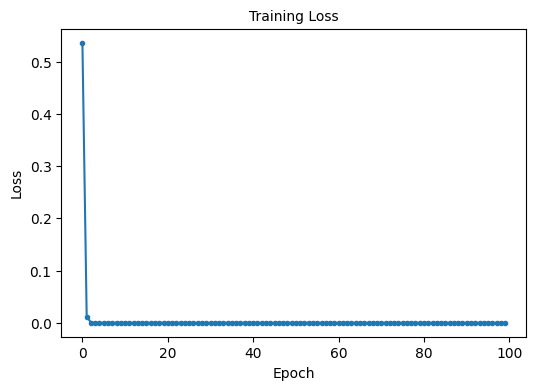

In [255]:
# plot the results
loss_saver = np.array(loss_saver)
plt.figure(figsize=(6,4))
plt.plot(np.arange(len(loss_saver)), loss_saver, '.-')
plt.title('Training Loss', fontsize=10)
plt.xlabel('Epoch', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.show()


# Evaluate the trained model using the testset

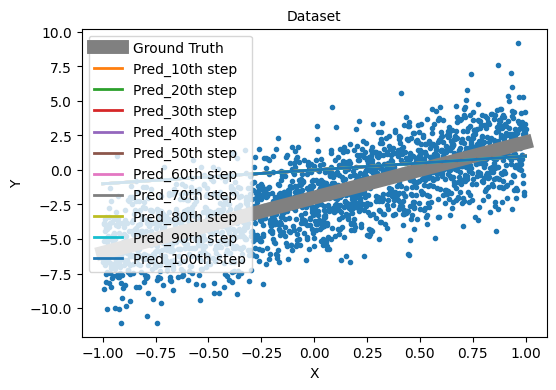

In [276]:
# evaluate the trained model
plt.figure(figsize=(6,4))

### Plot the dataset
plt.plot(x,y,'.')

### Plot the ground truth + predicted linear regressor
plt.plot(x_range, x_range*gt_w+gt_b, linewidth=10, color=[0.5, 0.5, 0.5], label = 'Ground Truth')

for idx, (w,b) in enumerate(zip(saved_w, saved_b)):
    plt.plot(x_range, x_range*w + b, linewidth=2, label='Pred_{}th step'.format(10*(idx+1)))


### Title and extras
plt.title('Dataset', fontsize=10)
plt.xlabel('X', fontsize=10)
plt.ylabel('Y', fontsize=10)
plt.legend()
plt.show()